# Library install and import

In [5]:
!pip install faker
!pip install mtcnn

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from faker import Faker
from sklearn.model_selection import train_test_split
from PIL import Image
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.patches as patches

#Mount drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset read

In [8]:
dataset = "/content/drive/My Drive/Colab Notebooks/FTL#2_Capstone_Project/data/data1/"

In [9]:
identities = os.listdir(dataset)
print(identities)

['12', '18', '19', '10', '5', '11', '2', '20', '14', '15', '4', '0', '7', '3', '8', '22', '17', '21', '1', '9', '13', '6', '16', '32', '55', '31', '60', '43', '70', '62', '57', '24', '39', '53', '40', '49', '23', '65', '52', '64', '50', '67', '48', '29', '61', '42', '54', '66', '34', '69', '58', '68', '72', '33', '30', '44', '59', '63', '25', '46', '51', '38', '37', '56', '26', '73', '28', '47', '41', '45', '36', '71', '35', '27', '74', '80', '113', '78', '92', '131', '120', '84', '101', '88', '130', '75', '128', '76', '125', '127', '111', '112', '119', '98', '104', '102', '116', '83', '109', '94', '85', '79', '95', '117', '121', '93', '105', '106', '123', '108', '90', '126', '118', '91', '107', '87', '115', '110', '82', '100', '114', '77', '99', '97', '86', '81', '129', '89', '124', '103', '122', '96', '139', '144', '167', '172', '143', '154', '138', '165', '146', '132', '160', '145', '149', '156', '150', '141', '161', '148', '169', '136', '170', '133', '153', '147', '171', '155', '16

In [10]:
def create_df(data_path):
    fake = Faker()
    data = []
    labels = os.listdir(data_path)
    label_to_name = {label: fake.name() for label in labels}
    for label in labels:
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                data.append({'image_path': image_path, 'label': label})
    df = pd.DataFrame(data)
    df['name'] = df['label'].map(label_to_name)
    return df

In [11]:
df = create_df(dataset)

# Exploratory Data Analysis (EDA)

In [12]:
df.shape

(12528, 3)

In [13]:
df.groupby('name').count()

,image_path,label
name,,
Adam Molina,72,72
Adam Tucker,72,72
Alice Carey,72,72
Alicia Gamble,72,72
Alison Wilson,72,72
...,...,...
Wesley Sanchez,72,72
William French,72,72
William Turner,72,72


In [14]:
sampled = df.sample(frac=1).reset_index(drop=True)
sampled = sampled.sample(100)
widths = []
heights = []
for image_path in sampled.image_path:
    image = Image.open(image_path)
    width, height = image.size
    widths.append(width)
    heights.append(height)
pd.DataFrame({'height':heights,'width':widths}).describe()

,height,width
count,100.0,100.0
mean,112.0,112.0
std,0.0,0.0
min,112.0,112.0
25%,112.0,112.0
50%,112.0,112.0
75%,112.0,112.0
max,112.0,112.0


<Axes: xlabel='name'>

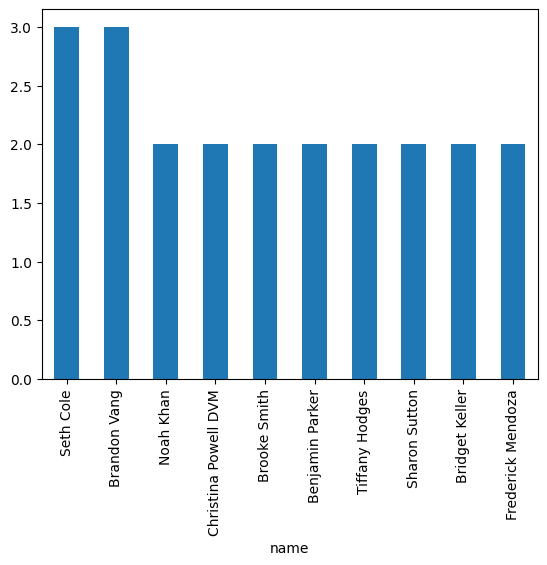

In [15]:
sampled['name'].value_counts()[:10].plot(kind = "bar")

#Feature engineering

In [16]:
def get_label_by_name(name):
    return df[df['name'] == name].sample(1).iloc[0]['label']

In [17]:
sample_name = df.sample(1).iloc[0]['name']
sample_label = get_label_by_name(sample_name)
sample_data = df.loc[(df['name'] == sample_name) & (df['label'] == sample_label)]
sample_data

,image_path,label,name
10872,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10873,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10874,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10875,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10876,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
...,...,...,...
10939,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10940,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10941,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox
10942,/content/drive/My Drive/Colab Notebooks/FTL#2_...,136,Johnathan Cox


In [18]:
filtered_negative = df[df['name'] != sample_name]
labeled_negative = filtered_negative.sample(frac=1).reset_index(drop=True)
labeled_negative.name = "labeled_negative"
labeled_negative

,image_path,label,name
0,/content/drive/My Drive/Colab Notebooks/FTL#2_...,14,labeled_negative
1,/content/drive/My Drive/Colab Notebooks/FTL#2_...,9,labeled_negative
2,/content/drive/My Drive/Colab Notebooks/FTL#2_...,113,labeled_negative
3,/content/drive/My Drive/Colab Notebooks/FTL#2_...,87,labeled_negative
4,/content/drive/My Drive/Colab Notebooks/FTL#2_...,90,labeled_negative
...,...,...,...
12451,/content/drive/My Drive/Colab Notebooks/FTL#2_...,173,labeled_negative
12452,/content/drive/My Drive/Colab Notebooks/FTL#2_...,64,labeled_negative
12453,/content/drive/My Drive/Colab Notebooks/FTL#2_...,72,labeled_negative
12454,/content/drive/My Drive/Colab Notebooks/FTL#2_...,92,labeled_negative


In [19]:
new_df = pd.concat([sample_data, labeled_negative])
new_df = new_df.sample(frac=1).reset_index(drop=True)
new_df

,image_path,label,name
0,/content/drive/My Drive/Colab Notebooks/FTL#2_...,53,labeled_negative
1,/content/drive/My Drive/Colab Notebooks/FTL#2_...,103,labeled_negative
2,/content/drive/My Drive/Colab Notebooks/FTL#2_...,170,labeled_negative
3,/content/drive/My Drive/Colab Notebooks/FTL#2_...,11,labeled_negative
4,/content/drive/My Drive/Colab Notebooks/FTL#2_...,79,labeled_negative
...,...,...,...
12523,/content/drive/My Drive/Colab Notebooks/FTL#2_...,122,labeled_negative
12524,/content/drive/My Drive/Colab Notebooks/FTL#2_...,58,labeled_negative
12525,/content/drive/My Drive/Colab Notebooks/FTL#2_...,82,labeled_negative
12526,/content/drive/My Drive/Colab Notebooks/FTL#2_...,6,labeled_negative


In [20]:
'''
widths = []
heights = []
for image_path in new_df.image_path:
    image = Image.open(image_path)
    width, height = image.size
    widths.append(width)
    heights.append(height)
pd.DataFrame({'height':heights,'width':widths}).describe()
'''

"\nwidths = []\nheights = []\nfor image_path in new_df.image_path:\n    image = Image.open(image_path)\n    width, height = image.size\n    widths.append(width)\n    heights.append(height)\npd.DataFrame({'height':heights,'width':widths}).describe()\n"

In [21]:
'''
new_df['name'].value_counts()[:10].plot(kind = "bar")
'''

'\nnew_df[\'name\'].value_counts()[:10].plot(kind = "bar")\n'

# Face detection algorithm

In [23]:
# Use out-of-the-box MTCNN algorithm to identify facial boundaries on a sample image
detector = MTCNN()
sample_data = df.sample(1)
image = cv2.imread(sample_data.image_path.iloc[0])
#image = cv2.imread("../input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/" + str(lfw_train.image_path[0]))
result = detector.detect_faces(image)
# That's it - the results have already been generated! Now we extract the boundaries that have been identified
print(result)
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 158ms/step
[{'box': [0, 4, 79, 116], 'confidence': 0.9999755620956421, 'keypoints': {'left_eye': (34, 48), 'right_eye': (69, 50), 'nose': (59, 70), 'mouth_left': (39, 93), 'mouth_right': (66, 94)}}]


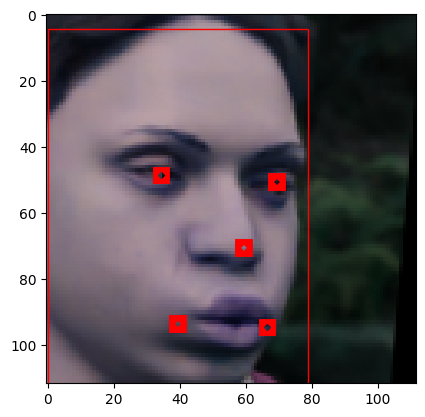

In [24]:
# Finally, we plot the image along with the face's bounding box and internal features (eyes, nose, and mouth corners)
fig,ax = plt.subplots(1)
ax.imshow(image)
# Create a Rectangle patch
rect = patches.Rectangle(bounding_box[0:2],bounding_box[2],bounding_box[3],linewidth=1,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
# Visualize all the internal features
for key in keypoints:
    rect_key = patches.Rectangle(keypoints[key],1,1,linewidth=10,edgecolor='r',facecolor='none')
    ax.add_patch(rect_key)
# Show the plots
plt.show()

# Model training

## Data split

In [25]:
sample_train, sample_test = train_test_split(new_df, test_size=0.3, random_state=42)
sample_train, sample_valid = train_test_split(sample_train, test_size=0.5, random_state=42)
print("Training set shapes:", sample_train.shape)
print("Testing set shapes:", sample_test.shape)
print("Validation set shapes:", sample_valid.shape)

Training set shapes: (4384, 3)
Testing set shapes: (3759, 3)
Validation set shapes: (4385, 3)


In [26]:
sample_train

,image_path,label,name
4378,/content/drive/My Drive/Colab Notebooks/FTL#2_...,149,labeled_negative
2768,/content/drive/My Drive/Colab Notebooks/FTL#2_...,32,labeled_negative
8052,/content/drive/My Drive/Colab Notebooks/FTL#2_...,59,labeled_negative
9263,/content/drive/My Drive/Colab Notebooks/FTL#2_...,56,labeled_negative
6508,/content/drive/My Drive/Colab Notebooks/FTL#2_...,57,labeled_negative
...,...,...,...
1846,/content/drive/My Drive/Colab Notebooks/FTL#2_...,38,labeled_negative
11518,/content/drive/My Drive/Colab Notebooks/FTL#2_...,5,labeled_negative
5185,/content/drive/My Drive/Colab Notebooks/FTL#2_...,144,labeled_negative
7495,/content/drive/My Drive/Colab Notebooks/FTL#2_...,137,labeled_negative


In [27]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import shutil

In [28]:
sample_classifier = Sequential()
sample_classifier.add(Conv2D(32, (3, 3), input_shape = (250, 250, 3), activation = 'relu'))
sample_classifier.add(MaxPooling2D(pool_size = (2, 2)))
sample_classifier.add(Flatten())
sample_classifier.add(Dense(units = 128, activation = 'relu'))
sample_classifier.add(Dense(units = 1, activation = 'sigmoid'))
sample_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Copy images for training to the appropriate folders (Training, Test, Validation)

In [29]:
base_path = "/content/drive/My Drive/Colab Notebooks/FTL#2_Capstone_Project/dataset/"
training_path = base_path + "training"
testing_path = base_path + "testing"
validation_path = base_path + "validation"

In [30]:
print(sample_train.sample(1).iloc[0]['image_path'])

/content/drive/My Drive/Colab Notebooks/FTL#2_Capstone_Project/data/data1/19/21.png


In [33]:
def copy_images(data, dir_name):
  if not os.path.exists(dir_name):
    os.makedirs(dir_name)
  for idx, row in data.iterrows():
    name = row['name']
    image_path = row['image_path']
    components = image_path.split("/")
    subfolder = components[-2]
    file_name = components[-1]
    new_file_name = subfolder + "_" + file_name
    if name == "labeled_negative":
      subfolder_path = os.path.join("negative", new_file_name)
    else:
      subfolder_path = os.path.join("positive", new_file_name)
    new_path = os.path.join(dir_name, subfolder_path)
    os.makedirs(os.path.dirname(new_path), exist_ok=True)
    shutil.copy(image_path, new_path)

In [34]:
copy_images(sample_train, training_path)

In [35]:
copy_images(sample_test, testing_path)

In [36]:
copy_images(sample_valid, validation_path)

In [37]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [38]:
sample_training_set = train_datagen.flow_from_directory(training_path,
target_size = (250, 250),
batch_size = 32,
class_mode = 'binary')

Found 4384 images belonging to 2 classes.


In [39]:
sample_validation_set = test_datagen.flow_from_directory(validation_path,
target_size = (250, 250),
batch_size = 32,
class_mode = 'binary')

Found 4385 images belonging to 2 classes.


In [40]:
sample_test_set = test_datagen.flow_from_directory(testing_path,
target_size = (250, 250),
batch_size = 32,
class_mode = 'binary')

Found 3759 images belonging to 2 classes.


In [ ]:
sample_history = sample_classifier.fit_generator(sample_training_set,
                                             # set steps per epoch equal to the number of training images
                                             steps_per_epoch = 137,
                                             # there is a six hour runtime limit on Kaggle Kernels, restricting the maximum epoch number
                                             epochs = 8,
                                             validation_data = sample_validation_set,
                                             validation_steps = 31)

<ipython-input-41-96073257a2e3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  sample_history = sample_classifier.fit_generator(sample_training_set,


Epoch 1/8
137/137 [==============================] - 560s 3s/step - loss: 0.3040 - accuracy: 0.9938 - val_loss: 0.0496 - val_accuracy: 0.9950
Epoch 2/8
137/137 [==============================] - 475s 3s/step - loss: 0.0387 - accuracy: 0.9941 - val_loss: 0.0481 - val_accuracy: 0.9929
Epoch 3/8
137/137 [==============================] - 474s 3s/step - loss: 0.0378 - accuracy: 0.9948 - val_loss: 0.0244 - val_accuracy: 0.9919
Epoch 4/8
137/137 [==============================] - 449s 3s/step - loss: 0.0311 - accuracy: 0.9943 - val_loss: 0.0269 - val_accuracy: 0.9960
Epoch 5/8
137/137 [==============================] - 442s 3s/step - loss: 0.0368 - accuracy: 0.9945 - val_loss: 0.0130 - val_accuracy: 0.9970
Epoch 6/8
137/137 [==============================] - 447s 3s/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.0351 - val_accuracy: 0.9950
Epoch 7/8
137/137 [==============================] - 438s 3s/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.0233 - val_accuracy: 0.9950
Epoch 

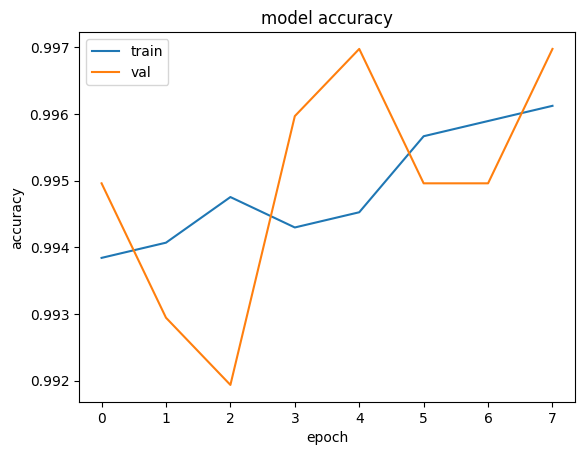

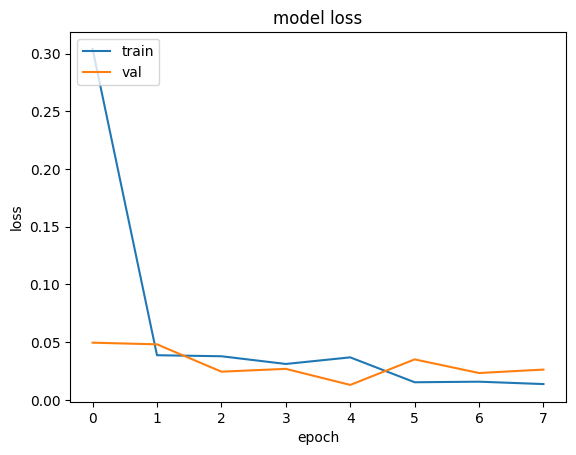

In [ ]:
plt.plot(sample_history.history['accuracy'])
plt.plot(sample_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(sample_history.history['loss'])
plt.plot(sample_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras.preprocessing import image

# create a function to predict class of images in a directory, given a trained classifier
def predictions(dir_name,classifier,binary):
    # dir_name should include name of predicted invididual - could edit this to iterate through folders in future
    predictions = []
    for im in os.listdir(dir_name):
        test_image = image.load_img(dir_name + str(im), target_size = (250,250))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        if(binary is True):
            result = float(str(classifier.predict(test_image))[2])
        else:
            result = np.argmax(classifier.predict(test_image))
        predictions.append(result)
    return(predictions)

In [ ]:
from typing import OrderedDict
sample_test_names = []
for i in range(len(sample_test)):
  sample_test_names.append(sample_test.iloc[i]['name'])
for i in range(len(sample_test)):
  sample_test.iloc[i]['name'] = sample_test_names[i]
sample_test_name_order = list(OrderedDict.fromkeys(sample_test_names))

In [ ]:
# Compute predictions
sample_predictions_0 = predictions(testing_path + "/" + sample_test_name_order[0] + "/", sample_classifier, binary = True)
sample_predictions_1 = predictions(testing_path + "/" + sample_test_name_order[1] + "/", sample_classifier, binary = True)

# Compare predictions to actual classes
sample_predictions_frame = pd.DataFrame(list(zip(sample_predictions_0 + sample_predictions_1,
                                                [0] * len(sample_predictions_0) + [1] * len(sample_predictions_1))),
                                       columns = ['Predictions','Actual'])

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/FTL#2_Capstone_Project/dataset/testing/labeled_negative/'

In [ ]:
# function for finding the precision and recall of predictions, for any number of predictive classes
def prec_acc(predictions_frame):
    precision = []
    accuracy = []
    recall = []
    for i in range(len(set(predictions_frame.Predictions))):
        tp = predictions_frame[np.logical_and(predictions_frame['Actual'] == i, predictions_frame['Predictions'] == i)].shape[0]
        tn = predictions_frame[np.logical_and(predictions_frame['Actual'] != i, predictions_frame['Predictions'] != i)].shape[0]
        fp = predictions_frame[np.logical_and(predictions_frame['Actual'] != i, predictions_frame['Predictions'] == i)].shape[0]
        fn = predictions_frame[np.logical_and(predictions_frame['Actual'] == i, predictions_frame['Predictions'] != i)].shape[0]
        total_preds = predictions_frame.shape[0]
        precision.append(tp/(tp + fp))
        accuracy.append((tp + tn)/total_preds)
        recall.append(tp/(tp + fn))
    return(accuracy,precision,recall)

In [ ]:
sample_accuracy = prec_acc(sample_predictions_frame)
print('Precision:' + str(sample_accuracy[1]))
print('Recall:' + str(sample_accuracy[2]))
print(sample_test_name_order)